In [3]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
import pandas as pd
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
import numpy as np
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.base import TransformerMixin, BaseEstimator
import scipy
from sklearn.model_selection import cross_val_score


In [4]:
import pandas as pd
df = pd.read_csv('/Users/emilywu/Downloads/accident_data.csv')

In [3]:
df.head()

Index Accident_Severity Accident Date   Latitude  \
0  200701BS64157           Serious    05-06-2019  51.506187   
1  200701BS65737           Serious    02-07-2019  51.495029   
2  200701BS66127           Serious    26-08-2019  51.517715   
3  200701BS66128           Serious    16-08-2019  51.495478   
4  200701BS66837            Slight    03-09-2019  51.488576   

              Light_Conditions           District Area  Longitude  \
0        Darkness - lights lit  Kensington and Chelsea  -0.209082   
1                     Daylight  Kensington and Chelsea  -0.173647   
2  Darkness - lighting unknown  Kensington and Chelsea  -0.210215   
3                     Daylight  Kensington and Chelsea  -0.202731   
4        Darkness - lights lit  Kensington and Chelsea  -0.192487   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                     1                   2                     Dry   
1                     1                   2             Wet or damp   
2                     1                   3                     Dry   
3                     1                   4                     Dry   
4                     1                   2                     Dry   

            Road_Type Urban_or_Rural_Area     Weather_Conditions  \
0  Single carriageway               Urban     Fine no high winds   
1  Single carriageway               Urban  Raining no high winds   
2                 NaN               Urban                    NaN   
3  Single carriageway               Urban     Fine no high winds   
4                 NaN               Urban                    NaN   

                           Vehicle_Type  
0                                   Car  
1                                   Car  
2                 Taxi/Private hire car  
3  Bus or coach (17 or more pass seats)  
4                         Other vehicle

In [83]:
df.drop("Index", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Severity        660679 non-null  object 
 1   Accident Date            660679 non-null  object 
 2   Latitude                 660654 non-null  float64
 3   Light_Conditions         660679 non-null  object 
 4   District Area            660679 non-null  object 
 5   Longitude                660653 non-null  float64
 6   Number_of_Casualties     660679 non-null  int64  
 7   Number_of_Vehicles       660679 non-null  int64  
 8   Road_Surface_Conditions  659953 non-null  object 
 9   Road_Type                656159 non-null  object 
 10  Urban_or_Rural_Area      660664 non-null  object 
 11  Weather_Conditions       646551 non-null  object 
 12  Vehicle_Type             660679 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 65.5+ MB


In [13]:
categorical=["Accident_Severity","District Area","Road_Surface_Conditions","Road_Type","Urban_or_Rural_Area","Weather_Conditions","Vehicle_Type"]
for i in categorical:
    print(df[i].value_counts())


Slight     563801
Serious     88217
Fatal        8661
Name: Accident_Severity, dtype: int64
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: District Area, Length: 422, dtype: int64
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: Road_Surface_Conditions, dtype: int64
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: Road_Type, dtype: int64
Urban          421663
Rural          238990
Unallocated        11
Name: Urban_or_Rural_Area, dtype: int64
Fine no high winds       520885
Raining no high winds     79696
Other    

In [5]:
df.describe()

Latitude      Longitude  Number_of_Casualties  Number_of_Vehicles
count  660654.000000  660653.000000         660679.000000       660679.000000
mean       52.553866      -1.431210              1.357040            1.831255
std         1.406922       1.383330              0.824847            0.715269
min        49.914430      -7.516225              1.000000            1.000000
25%        51.490690      -2.332291              1.000000            1.000000
50%        52.315641      -1.411667              1.000000            2.000000
75%        53.453452      -0.232869              1.000000            2.000000
max        60.757544       1.762010             68.000000           32.000000

In [37]:
# extra code – code to save the figures as high-res PNGs for the book
# To plot pretty figures
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports

import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Example of using a different directory
PROJECT_ROOT_DIR = "/Users/emilywu/Desktop/MMA/ML in Production" 
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [22]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
#export to html
profile.to_file("/Users/emilywu/Desktop/MMA/ML in Production/your_report.html")

/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/ydata_profiling/model/typeset_relations.py:117: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return pd.to_datetime(series)
/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/ydata_profiling/model/typeset_relations.py:117: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return pd.to_dateti

Saving figure attribute_histogram_plots


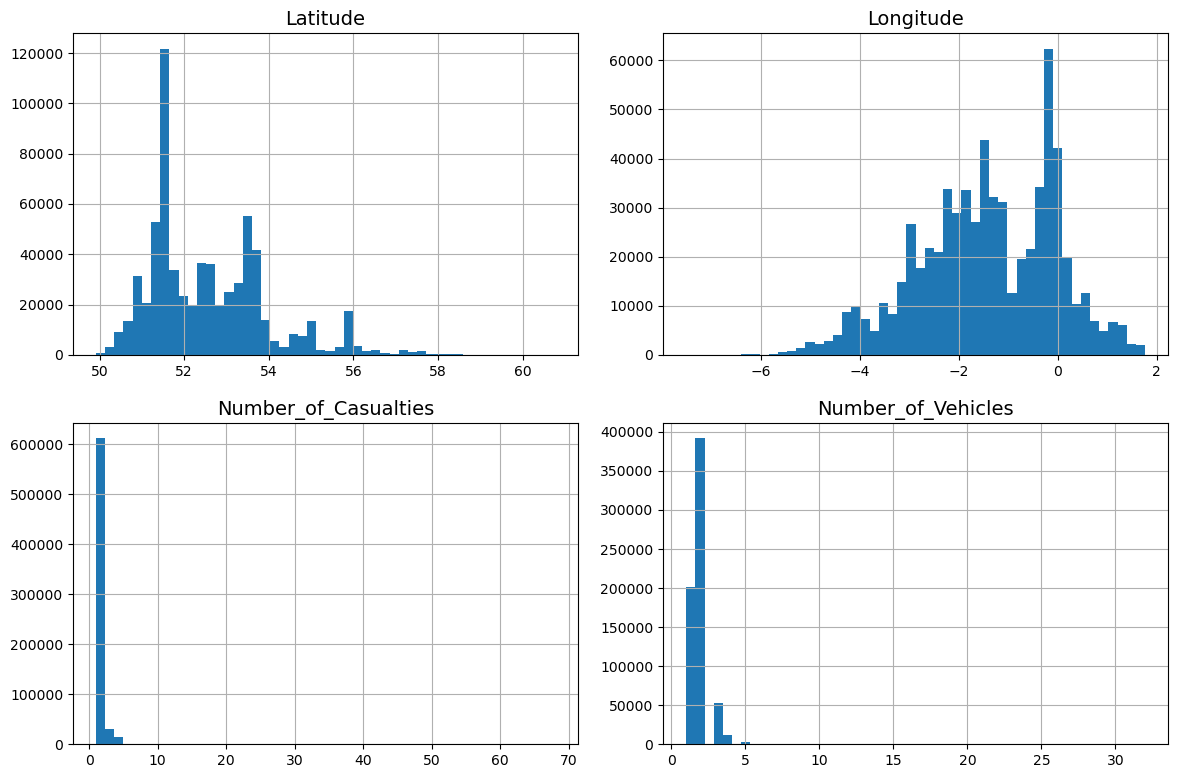

In [23]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

train test split

In [8]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = shuffle_and_split_data(df, 0.2)
len(train_set)
len(test_set)

132135

In [9]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [10]:
df.columns

Index(['Accident_Severity', 'Accident Date', 'Latitude', 'Light_Conditions',
       'District Area', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [11]:
df_with_id = df.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(df_with_id, 0.2, "index")

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


stratifify accident severity


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(df,df["Accident_Severity"]):
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [38]:
#or alternatively 
strat_train_set, strat_test_set = train_test_split(
    df, test_size=0.2, stratify=df["Accident_Severity"], random_state=42)

In [15]:
strat_test_set["Accident_Severity"].value_counts() / len(strat_test_set)


Slight     0.853363
Serious    0.133529
Fatal      0.013108
Name: Accident_Severity, dtype: float64

In [16]:
strat_train_set["Accident_Severity"].value_counts() / len(strat_train_set)


Slight     0.853367
Serious    0.133524
Fatal      0.013110
Name: Accident_Severity, dtype: float64

In [26]:
def Accident_Severity_proportions(data):
    return data["Accident_Severity"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": Accident_Severity_proportions(df),
    "Stratified": Accident_Severity_proportions(strat_test_set),
    "Random": Accident_Severity_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [27]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
Fatal    0.013110    0.013108  0.013414      2.323180      -0.014621
Serious  0.133524    0.133529  0.132903     -0.465144       0.004062
Slight   0.853367    0.853363  0.853683      0.037090      -0.000411

**EDA and Visualization**

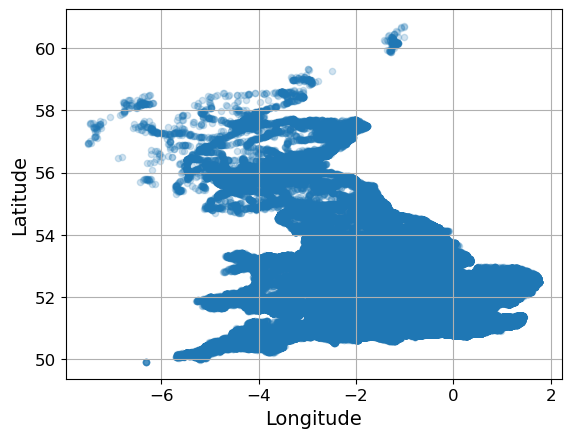

In [39]:
df_train = strat_train_set.copy()
import matplotlib .pyplot as plt
df_train.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
plt.show()

        Accident_Severity Accident Date   Latitude       Light_Conditions  \
175006                  2    08-10-2019  55.547438  Darkness - lights lit   
554323                  1    26-10-2022  53.548312               Daylight   
447359                  2    22-12-2021  52.194470               Daylight   
249051                  1    28-10-2020  52.489200  Darkness - lights lit   
543338                  1    03-09-2022  53.621596               Daylight   

           District Area  Longitude  Number_of_Casualties  Number_of_Vehicles  \
175006  Scottish Borders  -2.841244                     1                   1   
554323            Oldham  -2.125235                     1                   2   
447359         Cambridge   0.135239                     1                   1   
249051        Birmingham  -1.885240                     1                   1   
543338           Chorley  -2.662776                     1                   1   

       Road_Surface_Conditions           Road_Type

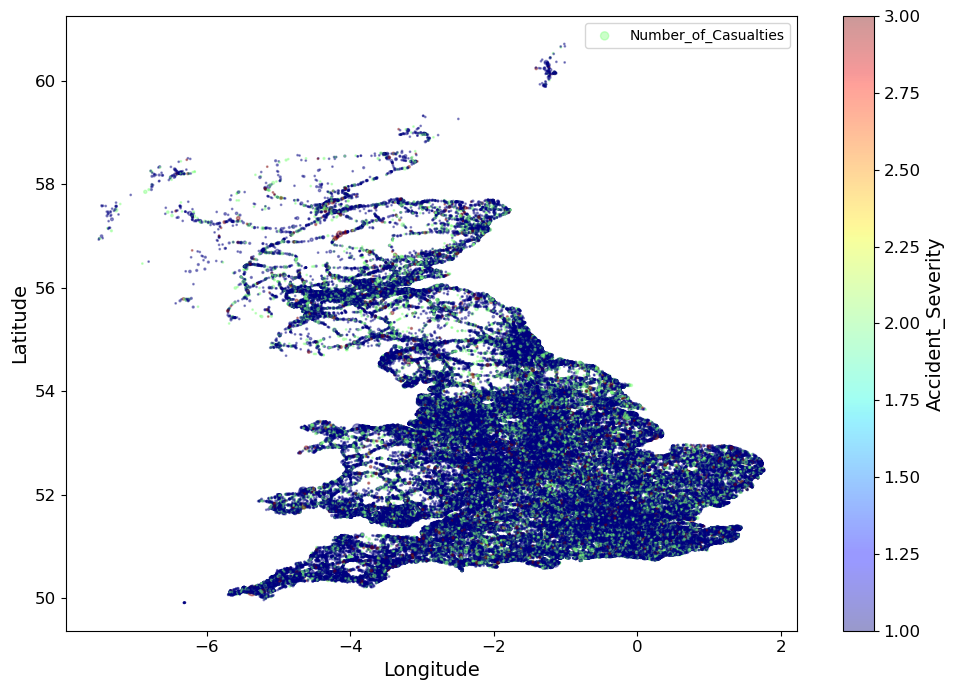

In [40]:

# Mapping the textual values to numeric values
severity_mapping = {'Slight': 1, 'Serious': 2, 'Fatal': 3}
df_train['Accident_Severity'] = df_train['Accident_Severity'].replace(severity_mapping)

# Display the transformed DataFrame
print(df_train.head())

df_train.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=df_train["Number_of_Casualties"], label="Number_of_Casualties", figsize=(10,7),
             c="Accident_Severity", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("Accident_scatterplot")

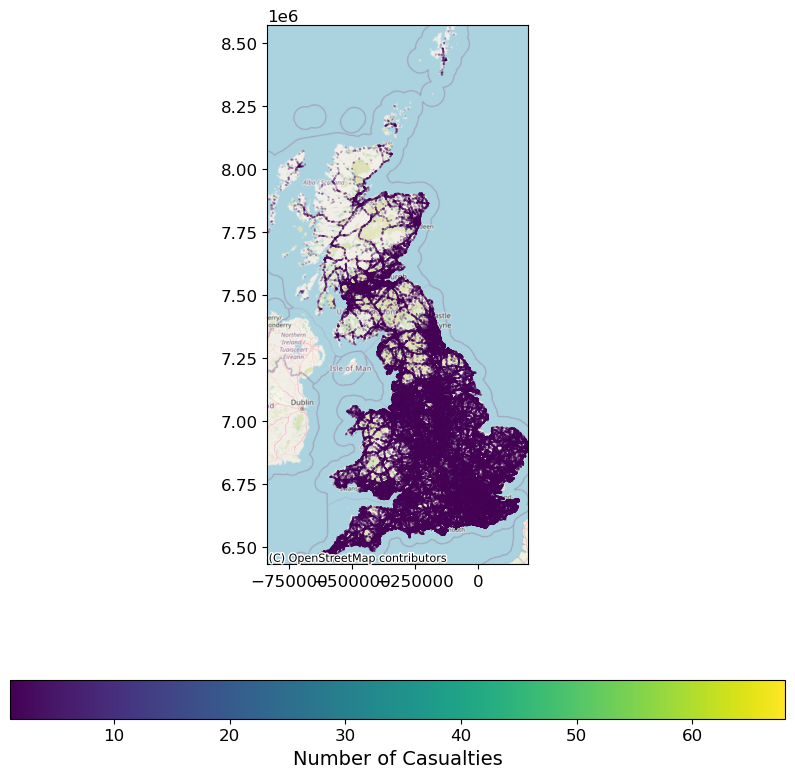

In [43]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx


gdf = gpd.GeoDataFrame(
    df, geometry=[Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
)

# Set the coordinate reference system (CRS) to longitude/latitude
gdf.set_crs(epsg=4326, inplace=True)

# Convert the CRS to Web Mercator for contextily
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='Number_of_Casualties', ax=ax, legend=True,
         legend_kwds={'label': "Number of Casualties",
                      'orientation': "horizontal"},markersize=gdf['Number_of_Casualties'] / 20,alpha=0.5)


try:
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
except Exception as e:
    print(f"Failed to add basemap: {e}")

# Adjust the axis to the extent of the data
ax.set_xlim(gdf.total_bounds[[0, 2]])
ax.set_ylim(gdf.total_bounds[[1, 3]])

plt.show()

In [44]:
corr_matrix = df_train.corr(numeric_only=True)


In [46]:
corr_matrix["Number_of_Casualties"].sort_values(ascending=False)

Number_of_Casualties    1.000000
Number_of_Vehicles      0.228682
Accident_Severity       0.087501
Latitude                0.031496
Longitude              -0.040920
Name: Number_of_Casualties, dtype: float64

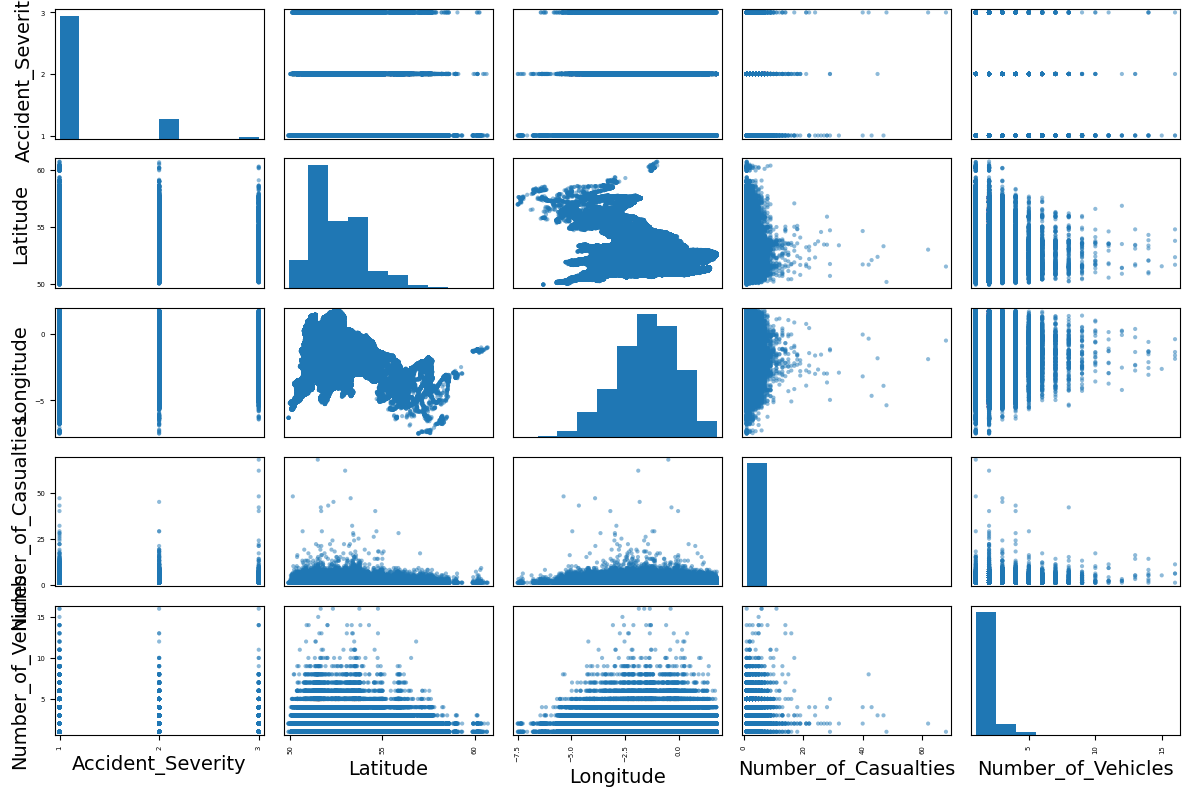

In [49]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix



# Create a scatter matrix of the numerical features in the DataFrame
scatter_matrix(df_train, figsize=(12, 8))

# Loop through the axes and adjust the font size
for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xticks(fontsize=5) 
    plt.yticks(fontsize=5)  

# Adjust layout to make room for the larger axis labels
plt.tight_layout()

# Save the figure
plt.savefig("scatter_matrix_plot.png")



**Construct Model Predictors and Target Variable**

In [125]:
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [126]:
df.drop("Index", axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df["Light_Conditions"] = df["Light_Conditions"].replace("Darkness - lights unlit", "Darkness - no lighting")
df.dropna(subset=["Longitude","Latitude"],inplace=True)

df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%d-%m-%Y')

##Impute "Weather_Conditions" missing values
# First, convert 'Accident Date' to datetime and sort by this column
df.sort_values('Accident Date', inplace=True)

#  apply forward fill or backward fill for missing 'Weather_Conditions'
# Forward Fill
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(method='ffill')

# Backward Fill (if needed)
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(method='bfill')


#Impute other attributes(all categorical)
# Create and fit the imputer
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[["Road_Surface_Conditions", "Road_Type", "Urban_or_Rural_Area"]])

# Apply the imputer to the DataFrame
imputed_data = imputer.transform(df[["Road_Surface_Conditions", "Road_Type", "Urban_or_Rural_Area"]])

# Overwrite original columns with imputed data
df[["Road_Surface_Conditions", "Road_Type", "Urban_or_Rural_Area"]] = imputed_data

# Check the result
print(df.head())


df["Month"]=df["Accident Date"].dt.month
df["Date"]=df["Accident Date"].dt.day


# Drop the 'Time of Day' helper column and original "Accident Date" column
df.drop(columns=["Accident Date"], inplace=True)


# Display the updated DataFrame
print(df.head())

       Accident_Severity   Latitude             Light_Conditions  \
148717            Slight  50.372992        Darkness - lights lit   
66790             Slight  53.787513  Darkness - lighting unknown   
122785           Serious  52.026437       Darkness - no lighting   
72252             Slight  52.568370                     Daylight   
180744            Slight  55.490604                     Daylight   

                      District Area  Longitude  Number_of_Casualties  \
148717                     Plymouth  -4.123620                     1   
66790   Kingston upon Hull, City of  -0.316467                     2   
122785                Milton Keynes  -0.766026                     2   
72252                 Wolverhampton  -2.143966                     1   
180744              South Larkshire  -3.695518                     2   

        Number_of_Vehicles Road_Surface_Conditions           Road_Type  \
148717                   1             Wet or damp  Single carriageway   
66790     

**binning Vehicle_Type**

In [127]:
def replace_vehicle_type(df, column, keywords):
    for keyword in keywords:
        keyword_lower = keyword.lower()
        df[column] = df[column].apply(lambda x: keyword if keyword_lower in x.lower() else x)
    df[column] = df[column].apply(lambda x: x if x in keywords else 'others')

# Keywords to search for
keywords = ['bus', 'motorcycle', 'van',"car"]

# Replace values in the DataFrame
replace_vehicle_type(df, 'Vehicle_Type', keywords)



In [130]:
df.nunique()


Accident_Severity               3
Latitude                   511617
Light_Conditions                4
District Area                 422
Longitude                  529766
Number_of_Casualties           36
Number_of_Vehicles             19
Road_Surface_Conditions         5
Road_Type                       5
Urban_or_Rural_Area             3
Vehicle_Type                    5
Month                          12
Date                           31
Snow                            2
Rain                            2
Fog                             2
dtype: int64

In [119]:
print(df["Weather_Conditions"].unique())


['Fine no high winds' 'Raining no high winds' 'Fine + high winds'
 'Raining + high winds' 'Snowing no high winds' 'Other'
 'Snowing + high winds' 'Fog or mist']


In [129]:
def derive_weather_columns(df):
    df['Snow'] = df['Weather_Conditions'].apply(lambda x: 1 if 'Snowing' in x else 0)
    df['Rain'] = df['Weather_Conditions'].apply(lambda x: 1 if 'Raining' in x else 0)
    df['Fog'] = df['Weather_Conditions'].apply(lambda x: 1 if 'Fog' in x or 'mist' in x else 0)
    return df

# Apply the function to the DataFrame
df = derive_weather_columns(df)
df.drop("Weather_Conditions",axis=1,inplace=True)

In [131]:
df.head()

Accident_Severity   Latitude             Light_Conditions  \
148717            Slight  50.372992        Darkness - lights lit   
66790             Slight  53.787513  Darkness - lighting unknown   
122785           Serious  52.026437       Darkness - no lighting   
72252             Slight  52.568370                     Daylight   
180744            Slight  55.490604                     Daylight   

                      District Area  Longitude  Number_of_Casualties  \
148717                     Plymouth  -4.123620                     1   
66790   Kingston upon Hull, City of  -0.316467                     2   
122785                Milton Keynes  -0.766026                     2   
72252                 Wolverhampton  -2.143966                     1   
180744              South Larkshire  -3.695518                     2   

        Number_of_Vehicles Road_Surface_Conditions           Road_Type  \
148717                   1             Wet or damp  Single carriageway   
66790                    2                     Dry  Single carriageway   
122785                   2             Wet or damp    Dual carriageway   
72252                    3                     Dry  Single carriageway   
180744                   3                    Snow    Dual carriageway   

       Urban_or_Rural_Area Vehicle_Type  Month  Date  Snow  Rain  Fog  
148717               Urban          car      1     1     0     0    0  
66790                Urban          car      1     1     0     0    0  
122785               Rural          car      1     1     0     0    0  
72252                Urban   motorcycle      1     1     0     0    0  
180744               Rural          car      1     1     1     0    0

In [132]:
from sklearn.preprocessing import OrdinalEncoder

accident_severity_column = df[['Accident_Severity']]

ordinal_encoder = OrdinalEncoder()

accident_encoded = ordinal_encoder.fit_transform(accident_severity_column)
ordinal_encoder.categories_

[array(['Fatal', 'Serious', 'Slight'], dtype=object)]

In [133]:
df.nunique()

Accident_Severity               3
Latitude                   511617
Light_Conditions                4
District Area                 422
Longitude                  529766
Number_of_Casualties           36
Number_of_Vehicles             19
Road_Surface_Conditions         5
Road_Type                       5
Urban_or_Rural_Area             3
Vehicle_Type                    5
Month                          12
Date                           31
Snow                            2
Rain                            2
Fog                             2
dtype: int64

In [138]:
df.nunique()

Accident_Severity               3
Latitude                   511617
Light_Conditions                4
District Area                 422
Longitude                  529766
Number_of_Casualties           36
Number_of_Vehicles             19
Road_Surface_Conditions         5
Road_Type                       5
Urban_or_Rural_Area             3
Vehicle_Type                    5
Month                          12
Date                           31
Snow                            2
Rain                            2
Fog                             2
dtype: int64

In [139]:
#onehotencoding for categorical variables: Vehicle_Type, Road_Type, Road_Surface_Conditions, Light_Conditions, Urban_or_Rural_Area
df = pd.get_dummies(df, columns=[
    'Vehicle_Type',
    'Road_Type',
    'Road_Surface_Conditions',
    'Light_Conditions',
    'Urban_or_Rural_Area'], drop_first=True)


In [141]:
strat_train_set, strat_test_set = train_test_split(
    df, test_size=0.2, stratify=df["Accident_Severity"], random_state=42)
x = strat_train_set.drop("Number_of_Casualties", axis=1)
y = strat_train_set["Number_of_Casualties"].copy()

In [77]:
df.head()

Accident_Severity   Latitude             Light_Conditions  \
51006                1.0  53.959330  Darkness - lighting unknown   
86299                1.0  53.062011                     Daylight   
45272                1.0  54.934169        Darkness - lights lit   
45271                NaN  55.074153        Darkness - lights lit   
39539                NaN  53.517556        Darkness - lights lit   

      District Area  Longitude  Number_of_Casualties  Number_of_Vehicles  \
51006          York  -1.083839                     1                   1   
86299  Amber Valley  -1.401439                     1                   3   
45272    Sunderland  -1.393005                     1                   1   
45271  Blyth Valley  -1.529494                     1                   1   
39539          Bury  -2.289233                     1                   1   

      Road_Surface_Conditions           Road_Type Urban_or_Rural_Area  \
51006                     Dry  Single carriageway               Urban   
86299             Wet or damp  Single carriageway               Rural   
45272             Wet or damp          Roundabout               Rural   
45271                     Dry  Single carriageway               Rural   
39539            Frost or ice  Single carriageway               Urban   

       Weather_Conditions Vehicle_Type  Month  Date  Snow  Rain  Fog  
51006  Fine no high winds          car      1     1     0     0    0  
86299  Fine no high winds          car      1     1     0     0    0  
45272   Fine + high winds          car      1     1     0     0    0  
45271  Fine no high winds          car      1     1     0     0    0  
39539               Other          car      1     1     0     0    0

**outliers**

In [140]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(df["Number_of_Casualties"].values.reshape(-1, 1))

**Standardization**

In [142]:
from sklearn.metrics.pairwise import rbf_kernel

Vech_num_array = rbf_kernel(df[["Number_of_Vehicles"]], [[2]], gamma=0.1)

num_v = np.linspace(df["Number_of_Vehicles"].min(),
                   df["Number_of_Vehicles"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(num_v, [[2]], gamma=gamma1)
rbf2 = rbf_kernel(num_v, [[2]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Number of Vehicles")
ax1.set_ylabel("Frequency")
ax1.hist(df["Number_of_Vehicles"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(num_v, rbf1, color=color, label="gamma = 0.10")
ax2.plot(num_v, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Num of Vehicles similarity", color=color)

plt.legend(loc="upper left")
save_fig("Num_of_Vehicles_similarity_plot")
plt.show()

Saving figure Num_of_Vehicles_similarity_plot


try out transformeer+regressor=TransformedTargetRegressor

In [143]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
accident_label = df["Number_of_Casualties"].copy()
scaled_labels = target_scaler.fit_transform(accident_label.to_frame())

model = LinearRegression()
model.fit(df[["Number_of_Vehicles"]], scaled_labels)
some_new_data = df[["Number_of_Vehicles"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [144]:
predictions

array([[1.13764767],
       [1.40160456],
       [1.40160456],
       [1.66556144],
       [1.66556144]])

In [145]:
#doing the same thing with previous cell, but simpler;  It will automatically use the transformer to scale the labels and train the regression model on the resulting scaled labels
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(df[["Number_of_Vehicles"]], accident_label)
predictions = model.predict(some_new_data)

**Custom Transformers**

In [147]:
from sklearn.preprocessing import FunctionTransformer

rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[2.]], gamma=0.1))
Vech_num = rbf_transformer.transform(df[["Number_of_Vehicles"]])

In [1]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [2]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [150]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(df[["Latitude", "Longitude"]],
                                           sample_weight=accident_label)

In [151]:
similarities[:3].round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.73, 0.  , 0.06, 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.03, 0.45, 0.  , 0.06, 0.  , 0.01],
       [0.33, 0.07, 0.  , 0.  , 0.3 , 0.1 , 0.  , 0.  , 0.01, 0.57]])

Saving figure district_cluster_plot


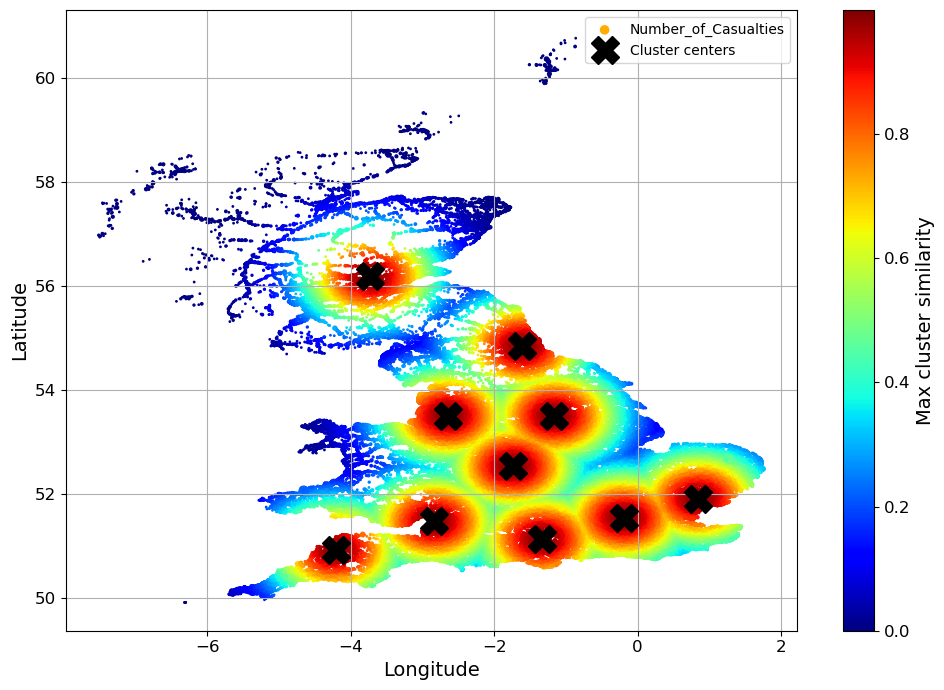

In [152]:
df["Max cluster similarity"] = similarities.max(axis=1)

df.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=df["Number_of_Casualties"], label="Number_of_Casualties",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

**Transformation Pipelines**

numerical vars and categorical vars pipeline

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660601 entries, 148717 to 621882
Data columns (total 29 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Accident_Severity                             660601 non-null  object 
 1   Latitude                                      660601 non-null  float64
 2   District Area                                 660601 non-null  object 
 3   Longitude                                     660601 non-null  float64
 4   Number_of_Casualties                          660601 non-null  int64  
 5   Number_of_Vehicles                            660601 non-null  int64  
 6   Month                                         660601 non-null  int64  
 7   Date                                          660601 non-null  int64  
 8   Snow                                          660601 non-null  int64  
 9   Rain                                       

In [161]:
df = pd.read_csv('/Users/emilywu/Downloads/accident_data.csv')

In [3]:
from sklearn.pipeline import Pipeline

#2 ways, either way is fine; make_pipelines you don't need to name the steps

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

#steps of the pipeline
num_pipeline.steps



NameError: name 'SimpleImputer' is not defined

In [7]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from datetime import datetime
df = pd.read_csv('/Users/emilywu/Downloads/accident_data.csv')
# Custom Transformers and Functions
class ReplaceLightConditions(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["Light_Conditions"] = X["Light_Conditions"].replace("Darkness - lights unlit", "Darkness - no lighting")
        return X


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(
            self.n_clusters, n_init=10, random_state=self.random_state
        )
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(self.columns_to_drop, axis=1)
    

class DropMissingValuesTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.dropna()  # Drops rows with any missing values
  
class DropDuplicatesTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop_duplicates()

# Custom Transformer for Vehicle Type Replacement
class ReplaceVehicleTypeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column, keywords):
        self.column = column
        self.keywords = keywords

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def replace_type(x):
            x_lower = x.lower()
            for keyword in self.keywords:
                if keyword.lower() in x_lower:
                    return keyword
            return 'others'

        X[self.column] = X[self.column].apply(replace_type)
        return X


# Custom Pipeline for Ordinal Encoding
class OrdinalEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        # Store the columns to be transformed
        self.columns = columns

    def fit(self, X, y=None):
        # Initialize the encoder
        self.encoder = OrdinalEncoder()
        # Fit the encoder only on specified columns
        if self.columns is not None:
            self.encoder.fit(X[self.columns])
        return self

    def transform(self, X):
        # Apply the transformation only on specified columns
        if self.columns is not None:
            X_encoded = self.encoder.transform(X[self.columns])
            X[self.columns] = X_encoded
        return X

# Custom Pipeline for One-Hot Encoding
class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.get_dummies(X, columns=self.columns, drop_first=True)
    
class ArrayToDataFrameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(X, columns=self.column_names)








In [8]:
## for Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area, Weather_Conditions
from sklearn.preprocessing import OneHotEncoder, StandardScaler
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")
)
cols_to_drop_final=["Index","Accident Date", "Weather_Conditions","Latitude","Longitude","District Area"]
light=make_pipeline(ReplaceLightConditions(),OneHotEncoder(handle_unknown="ignore"))
severity=make_pipeline(OrdinalEncoderTransformer(columns=["Accident_Severity"]))
vehichle=make_pipeline(ReplaceVehicleTypeTransformer('Vehicle_Type', ['bus', 'motorcycle', 'van', 'car']),OneHotEncoder(handle_unknown="ignore"))
geo = make_pipeline(SimpleImputer(strategy="median"),ClusterSimilarity(n_clusters=10, random_state=42))
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())


In [9]:
preprocessing = ColumnTransformer(
    [
        ("cat", cat_pipeline, ["Road_Surface_Conditions","Road_Type","Urban_or_Rural_Area","Weather_Conditions"]),
        ("Light",light,["Light_Conditions"]),
        ("severity",severity,["Accident_Severity"]),
        ("Vehichle",vehichle,["Vehicle_Type"]),
         ("Cluster",geo,["Latitude", "Longitude"]),
        ("drop","drop",cols_to_drop_final)
        
        
    
        
        
        
        ]    
        ,remainder=default_num_pipeline,
)

In [34]:
df.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [140]:
from sklearn.model_selection import train_test_split
X = df.drop("Number_of_Casualties", axis=1)
y = df["Number_of_Casualties"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train_preprocessed = preprocessing.fit_transform(X_train)

In [36]:
X_train_preprocessed.shape

(462475, 42)

In [38]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Road_Surface_Conditions', 'Road_Type',
                                  'Urban_or_Rural_Area',
                                  'W...
                                                                                          'motorcycle',
                                                                                          'van',
                                                                                          'car'])),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Vehicle_Type']),
                                ('Cluster',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('clustersimilarity',
                                                  ClusterSimilarity(random_state=42))]),
                                 ['Latitude', 'Longitude']),
                                ('drop', 'drop',
                                 ['Index', 'Accident Date',
                                  'Weather_Conditions', 'Latitude',
                                  'District Area'])])

**Select and Train Model**

In [39]:
y_train

97821     1
67678     1
486347    1
47833     1
186848    1
         ..
644167    1
259178    1
365838    1
131932    1
121958    1
Name: Number_of_Casualties, Length: 462475, dtype: int64

In [40]:
lin_reg = make_pipeline(
    preprocessing,
    LinearRegression(),
)

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Road_Surface_Conditions'...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle_Type']),
                                                 ('Cluster',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('clustersimilarity',
                                                                   ClusterSimilarity(random_state=42))]),
                                                  ['Latitude', 'Longitude']),
                                                 ('drop', 'drop',
                                                  ['Index', 'Accident Date',
                                                   'Weather_Conditions',
                                                   'Latitude',
                                                   'District Area'])])),
                ('linearregression', LinearRegression())])

In [43]:
lin_reg_predict = lin_reg.predict(X_train)
lin_reg_rmse = mean_squared_error(y_train, lin_reg_predict, squared=False)
print(f"Training RMSE:{lin_reg_rmse}")

Training RMSE:0.7933073466652709


**Decision Tree**

In [44]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = make_pipeline(
    preprocessing,
    DecisionTreeRegressor(random_state=42),
)

dt_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Road_Surface_Conditions'...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle_Type']),
                                                 ('Cluster',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('clustersimilarity',
                                                                   ClusterSimilarity(random_state=42))]),
                                                  ['Latitude', 'Longitude']),
                                                 ('drop', 'drop',
                                                  ['Index', 'Accident Date',
                                                   'Weather_Conditions',
                                                   'Latitude',
                                                   'District Area'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [45]:
dt_reg_predict = dt_reg.predict(X_train)
dt_reg_rmse = mean_squared_error(y_train, dt_reg_predict, squared=False)

print(f"Training RMSE:{dt_reg_rmse}")

Training RMSE:0.08660913494479526


**Random Foreset**

In [46]:
rf_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42,n_jobs=-1),
)

rf_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Road_Surface_Conditions'...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle_Type']),
                                                 ('Cluster',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('clustersimilarity',
                                                                   ClusterSimilarity(random_state=42))]),
                                                  ['Latitude', 'Longitude']),
                                                 ('drop', 'drop',
                                                  ['Index', 'Accident Date',
                                                   'Weather_Conditions',
                                                   'Latitude',
                                                   'District Area'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [47]:
rf_reg_predict = rf_reg.predict(X_train)
rf_reg_rmse = mean_squared_error(y_train, rf_reg_predict, squared=False)

print(f"Training RMSE:{rf_reg_rmse}")

Training RMSE:0.32166354216881987


**Cross-Validation**

In [50]:
def get_cross_val_scores(model, X, y, cv=10):
    scores = cross_val_score(
        model,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=cv,
        verbose=2,
        n_jobs=-1,
    )
    return -scores


def print_model_performance(model, X_train, y_train, cv=10):
    cv_scores = get_cross_val_scores(model, X_train, y_train, cv=cv)
    train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)

    print(f"Training RMSE:{model}")
    print(f"Cross Validdation RMSE (n={cv}) for {model}: {cv_scores.mean():.2f} +/- {cv_scores.std():.2f}")

    return cv_scores

In [52]:
print_model_performance(lin_reg, X_train, y_train)
print_model_performance(dt_reg, X_train, y_train)
print_model_performance(rf_reg, X_train, y_train, cv=5)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=   9.1s
[CV] END .................................................... total time=   9.4s
[CV] END .................................................... total time=   9.9s
[CV] END .................................................... total time=   9.5s
[CV] END .................................................... total time=   9.2s
[CV] END .................................................... total time=   9.0s
[CV] END .................................................... total time=   8.8s


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   13.5s remaining:    5.8s


[CV] END .................................................... total time=   8.7s
[CV] END .................................................... total time=   4.2s
[CV] END .................................................... total time=   4.1s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.2s finished


Training RMSE:Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Road_Surface_Conditions'...
                                                                   OneHotEncoder(hand

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=  37.0s
[CV] END .................................................... total time=  37.3s
[CV] END .................................................... total time=  36.7s
[CV] END .................................................... total time=  36.8s
[CV] END .................................................... total time=  37.7s
[CV] END .................................................... total time=  36.9s
[CV] END .................................................... total time=  37.3s


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   40.1s remaining:   17.2s


[CV] END .................................................... total time=  37.1s
[CV] END .................................................... total time=  16.8s
[CV] END .................................................... total time=  16.5s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   56.1s finished


Training RMSE:Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Road_Surface_Conditions'...
                                                                   OneHotEncoder(hand

array([1.15776052, 1.12969826, 1.11176733, 1.10747519, 1.09948678,
       1.16857476, 1.1094253 , 1.14840827, 1.10991049, 1.12744561])

In [60]:
print_model_performance(rf_reg, X_train, y_train, cv=5)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time= 9.9min
[CV] END .................................................... total time= 9.9min


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 10.0min remaining: 14.9min


[CV] END .................................................... total time= 9.9min
[CV] END .................................................... total time= 9.9min
[CV] END .................................................... total time= 9.9min


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.0min finished


Training RMSE:Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Road_Surface_Conditions'...
                                                                   OneHotEncoder(hand

array([0.86082076, 0.83194434, 0.85595151, 0.83393285, 0.83966757])

**Model Evaluation on test set**

In [53]:
final_model=lin_reg
final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

print(f"Final RMSE: {final_rmse:.2f}")

Final RMSE: 0.78


In [54]:
from scipy import stats
alpha = 0.95
squared_errors = (final_predictions - y_test) ** 2
ci = np.sqrt(
    stats.t.interval(
        alpha,
        len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors),
    )
)

ci

array([0.76158459, 0.80510773])

In [56]:
import joblib

joblib.dump(final_model, "Number_of_Casualties_prediction_model.pkl")

['Number_of_Casualties_prediction_model.pkl']

In [58]:
model = joblib.load("Number_of_Casualties_prediction_model.pkl")

In [59]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Road_Surface_Conditions'...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle_Type']),
                                                 ('Cluster',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('clustersimilarity',
                                                                   ClusterSimilarity(random_state=42))]),
                                                  ['Latitude', 'Longitude']),
                                                 ('drop', 'drop',
                                                  ['Index', 'Accident Date',
                                                   'Weather_Conditions',
                                                   'Latitude',
                                                   'District Area'])])),
                ('linearregression', LinearRegression())])

### **Assignment 2**

**Use case senario: Using road, light , weather conditions to predict the number of causlties in accidents.**\
**Treatment: 'Light_Conditions_Darkness - lights lit'**\
**other predictors: all attributes available** (X_transformed_df.columns)\
**y: number of causalties**


In [72]:
df = pd.read_csv('/Users/emilywu/Downloads/accident_data.csv')
X = df.drop("Number_of_Casualties", axis=1)
y = df["Number_of_Casualties"]
X_preprocessed = preprocessing.fit_transform(X)

feature_names_out_cat = preprocessing.named_transformers_['cat']['onehotencoder'].get_feature_names(
    input_features=["Road_Surface_Conditions", "Road_Type", "Urban_or_Rural_Area", "Weather_Conditions"]
)

feature_names_out_light = preprocessing.named_transformers_['Light']['onehotencoder'].get_feature_names(
    input_features=["Light_Conditions"]
)




feature_names_out_vehichle = preprocessing.named_transformers_['Vehichle']['onehotencoder'].get_feature_names(
    input_features=["Vehicle_Type"]
)

# Get the feature names from the ClusterSimilarity transformer within preprocessing
feature_names_out_cluster = ["Cluster 0 similarity", "Cluster 1 similarity", "Cluster 2 similarity", "Cluster 3 similarity","Cluster 4 similarity", "Cluster 5 similarity", "Cluster 6 similarity", "Cluster 7 similarity", "Cluster 8 similarity", "Cluster 9 similarity"]

Numeric_cols = ['Number_of_Vehicles']
# Create a DataFrame with the transformed data and feature names
X_transformed_df = pd.DataFrame(X_preprocessed, columns=list(feature_names_out_cat) + list(feature_names_out_light) + 
                                list(feature_names_out_vehichle) + Numeric_cols + list(feature_names_out_cluster)+list(["Accident_Severity"]))




In [143]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import entropy
import warnings

from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.inference.tf import DragonNet
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset.regression import *
from causalml.metrics import *

import os, sys

%matplotlib inline

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_palette('Paired')
plt.rcParams['figure.figsize'] = (12,8)

In [73]:
X_transformed_df.columns

Index(['Road_Surface_Conditions_Dry',
       'Road_Surface_Conditions_Flood over 3cm. deep',
       'Road_Surface_Conditions_Frost or ice', 'Road_Surface_Conditions_Snow',
       'Road_Surface_Conditions_Wet or damp', 'Road_Type_Dual carriageway',
       'Road_Type_One way street', 'Road_Type_Roundabout',
       'Road_Type_Single carriageway', 'Road_Type_Slip road',
       'Urban_or_Rural_Area_Rural', 'Urban_or_Rural_Area_Unallocated',
       'Urban_or_Rural_Area_Urban', 'Weather_Conditions_Fine + high winds',
       'Weather_Conditions_Fine no high winds',
       'Weather_Conditions_Fog or mist', 'Weather_Conditions_Other',
       'Weather_Conditions_Raining + high winds',
       'Weather_Conditions_Raining no high winds',
       'Weather_Conditions_Snowing + high winds',
       'Weather_Conditions_Snowing no high winds',
       'Light_Conditions_Darkness - lighting unknown',
       'Light_Conditions_Darkness - lights lit',
       'Light_Conditions_Darkness - no lighting', 'Light_Cond

**Tried grouping Light conditions however the importance decreases to 0, so will go with having several conditions of lighting as different attributes independently**

In [71]:
# X_transformed_df['Light'] = np.where(
#     (X_transformed_df['Light_Conditions_Darkness - lights lit'] == 1) | 
#     (X_transformed_df['Light_Conditions_Daylight'] == 1), 
#     1, 
#     0
# )

# # Drop the original columns
# X_transformed_df.drop([
#     'Light_Conditions_Darkness - lighting unknown',
#     'Light_Conditions_Darkness - lights lit',
#     'Light_Conditions_Darkness - no lighting',
#     'Light_Conditions_Daylight'
#     ], axis=1, inplace=True)


In [74]:
#assign treatment variable
treatment_column = 'Light_Conditions_Darkness - lights lit'
w = X_transformed_df[treatment_column].astype(int)  
feature_names=X_transformed_df.columns
X=X_transformed_df.drop(treatment_column, axis=1)



**XGBTRegressor**

In [75]:
from causalml.inference.meta import XGBTRegressor

# Initialize the XGBTRegressor
tlearner = XGBTRegressor()

# Fit the model to your data
ate_t = tlearner.estimate_ate(X=X, treatment=w, y=y)


print(ate_t)


(array([0.05148783]), array([0.04693707]), array([0.05603859]))


In [76]:
#fit the model and predict the individual treatment effect
tlearner_tau = tlearner.fit_predict(X, w, y)


In [77]:
tlearner.get_importance(X=X_transformed_df, 
                        tau=tlearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

{1: Accident_Severity                               0.177046
 Vehicle_Type_bus                                0.121581
 Cluster 4 similarity                            0.096217
 Road_Type_Slip road                             0.084984
 Cluster 7 similarity                            0.052421
 Cluster 1 similarity                            0.050377
 Cluster 0 similarity                            0.039355
 Cluster 5 similarity                            0.038595
 Light_Conditions_Darkness - no lighting         0.038285
 Urban_or_Rural_Area_Rural                       0.036422
 Cluster 2 similarity                            0.034958
 Cluster 9 similarity                            0.031301
 Cluster 6 similarity                            0.029032
 Road_Type_Single carriageway                    0.028144
 Cluster 3 similarity                            0.026313
 Road_Type_Dual carriageway                      0.018167
 Cluster 8 similarity                            0.016494
 Road_Surfa

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

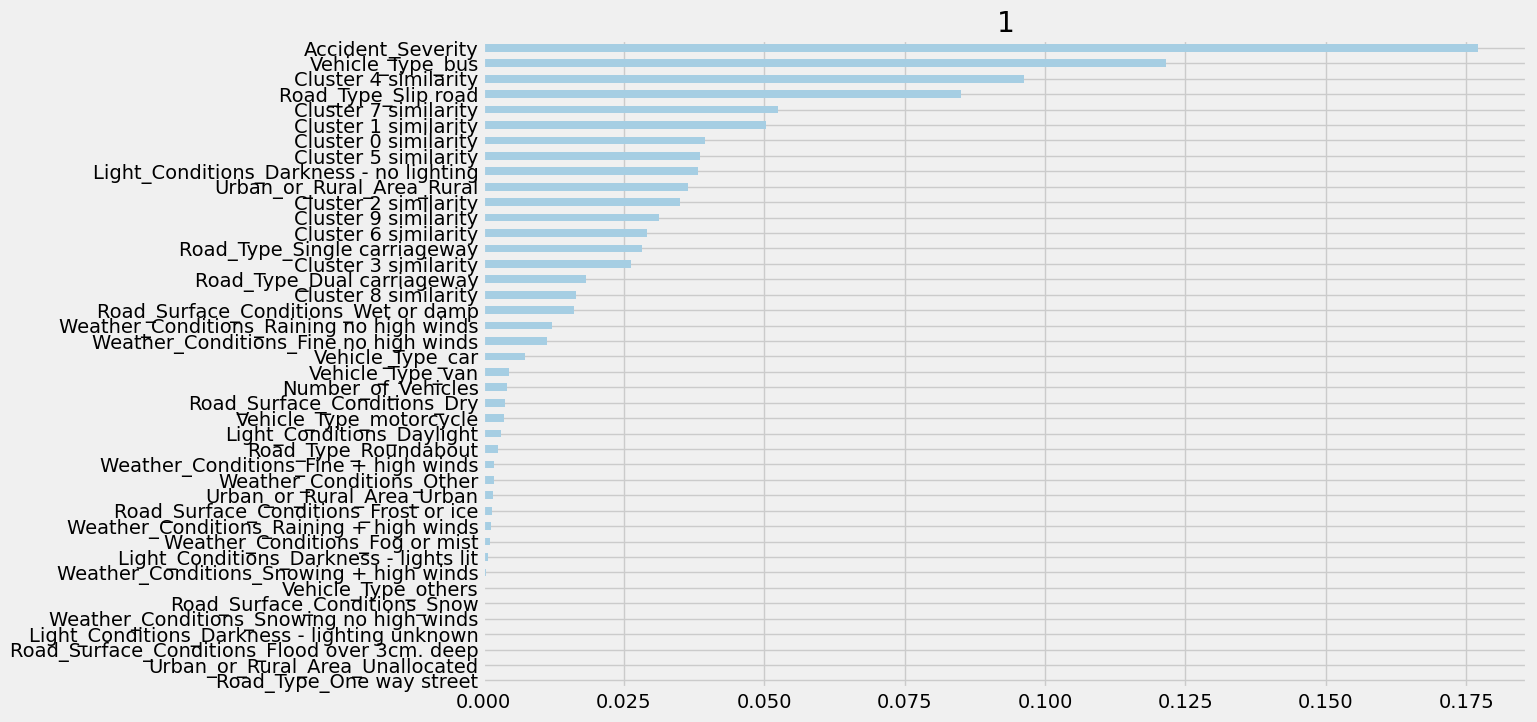

In [78]:
tlearner.plot_importance(X=X_transformed_df, 
                         tau=tlearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

In [79]:
tlearner.get_importance(X=X_transformed_df, 
                        tau=tlearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

{1: Vehicle_Type_bus                                0.157025
 Accident_Severity                               0.139478
 Cluster 1 similarity                            0.068333
 Cluster 6 similarity                            0.059788
 Urban_or_Rural_Area_Rural                       0.034148
 Cluster 8 similarity                            0.034022
 Cluster 4 similarity                            0.029224
 Road_Type_Slip road                             0.026863
 Cluster 9 similarity                            0.025210
 Cluster 2 similarity                            0.024197
 Cluster 0 similarity                            0.023129
 Cluster 7 similarity                            0.020255
 Road_Type_Single carriageway                    0.017976
 Cluster 3 similarity                            0.017111
 Road_Surface_Conditions_Wet or damp             0.016425
 Cluster 5 similarity                            0.012755
 Light_Conditions_Darkness - no lighting         0.011885
 Weather_Co

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

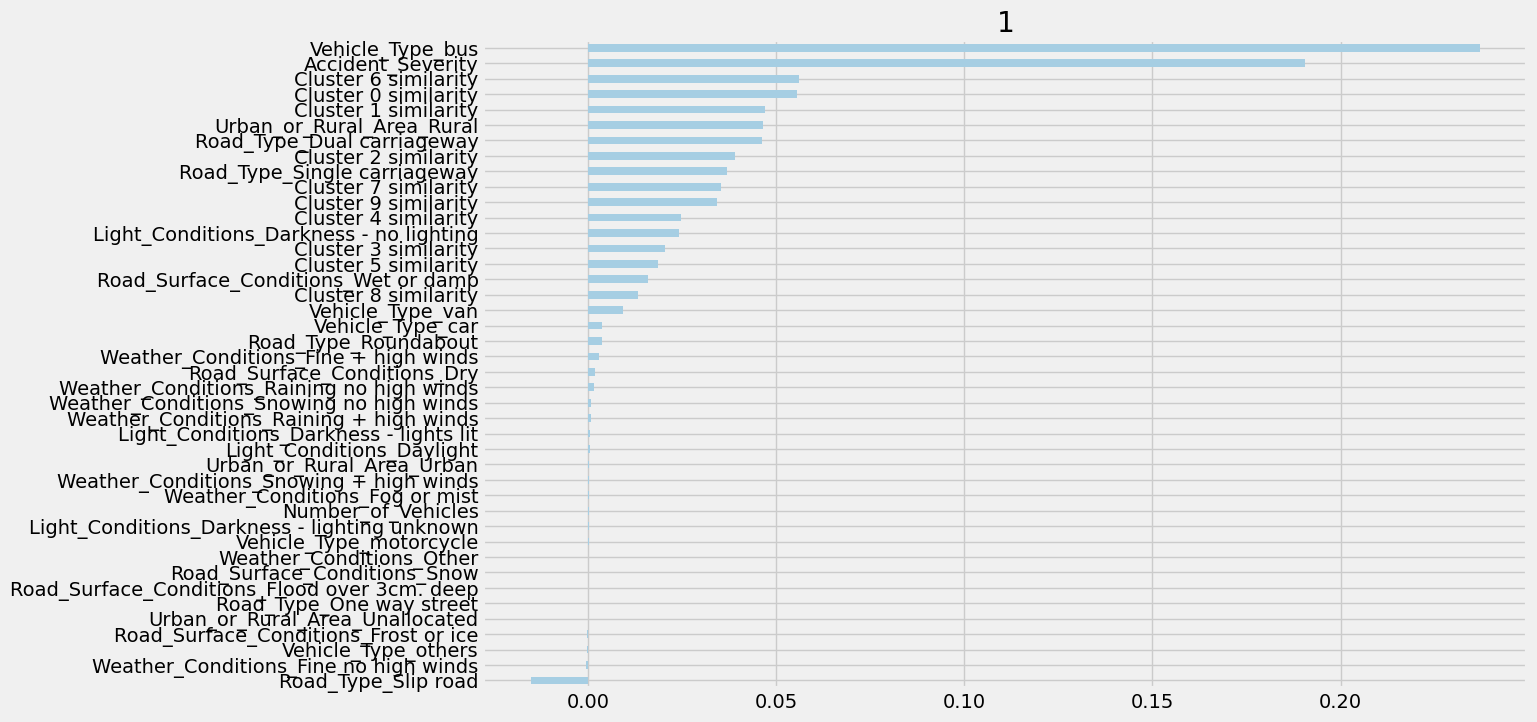

In [80]:
tlearner.plot_importance(X=X_transformed_df, 
                         tau=tlearner_tau, 
                         normalize=True, 
                         method='permutation', 
                         features=feature_names)

In terms of method of calculating feature importance, auto and permuation are giving slightly different results.

### Key Observations:

- **Top Features**: Both methods identified `Vehicle_Type_bus` and `Accident_Severity` as highly important features, but their order of importance is swapped. This indicates that regardless of the method, these two features are crucial in predicting the outcome.

- **Cluster Similarity**: Features related to cluster similarity(derived from latitude and longitude that represents geo data ) appear prominently in both methods, suggesting that the location of accidents play a significant role in the model. However, the specific clusters identified as important vary between the two methods, which could suggest differences in how each method evaluates the influence of correlated features.

- **Environmental Conditions**: Both methods highlight the significance of light and road surface conditions, reflecting their impact on the model's predictions. However, the permutation method seems to reduce the relative importance of specific light conditions and weather compared to the auto method, possibly due to the permutation method's ability to account for interactions between features more effectively.

- **Urban or Rural Area**: The feature `Urban_or_Rural_Area_Rural` is identified as important by both methods but ranks higher in the permutation method. This could indicate that the permutation method captures the contextual impact of the environment on the outcome more effectively.

- **Negative Importance**: The permutation method uniquely identifies a few features with slightly negative importance scores (e.g., `Light_Conditions_Darkness - lights lit`, `Weather_Conditions_Fog or mist`). Negative values can suggest that permuting these features leads to a slight improvement in the model's accuracy, indicating that their original contribution might be misleading or non-informative. This aspect is not captured in the auto method.

### Conclusion:

Both the auto and permutation methods offer valuable insights into which features are most influential in predicting the number of causalties. The auto method highlights features that are statistically significant within the model's structure, while the permutation method provides a more nuanced understanding of feature importance by evaluating the impact of each feature on the model's predictive performance in a more holistic manner. The slight discrepancies and negative importance scores observed with the permutation method underscore the complex interdependencies among features and their collective impact on model predictions.


**LRSRegressor**

In [98]:

# Initialize the S-learner with linear regression as the base learner
slearner = LRSRegressor()

# Estimate the Average Treatment Effect (ATE) using the S-learner
ate_s = slearner.estimate_ate(X=X, treatment=w, y=y)

print('Using LRSRegressor as the base learner')
print(ate_s)


Using LRSRegressor as the base learner
(array([-6.06477671e+08]), array([-3.63654041e+09]), array([2.42358507e+09]))


In [99]:
slearner_tau = slearner.fit_predict(X, w, y)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

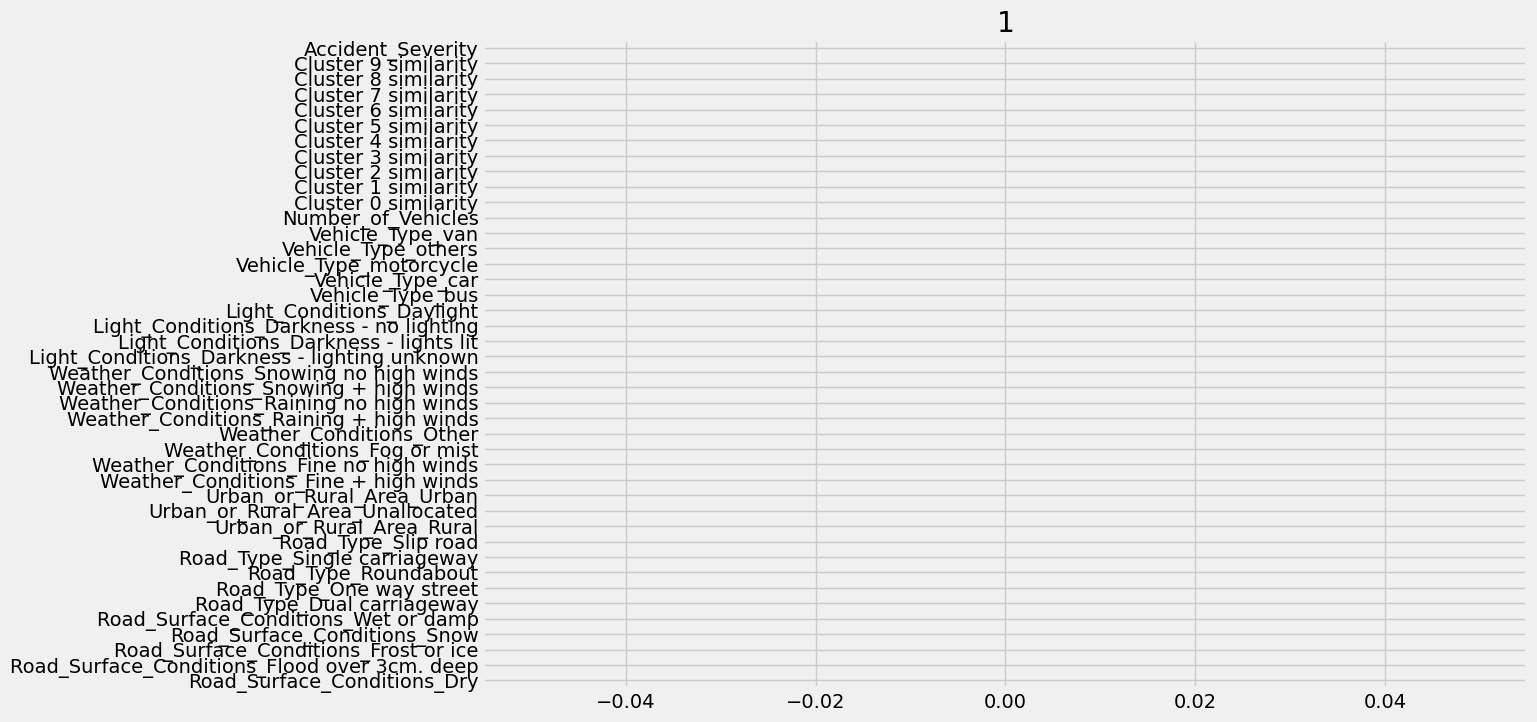

In [100]:
slearner.plot_importance(X=X_transformed_df, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

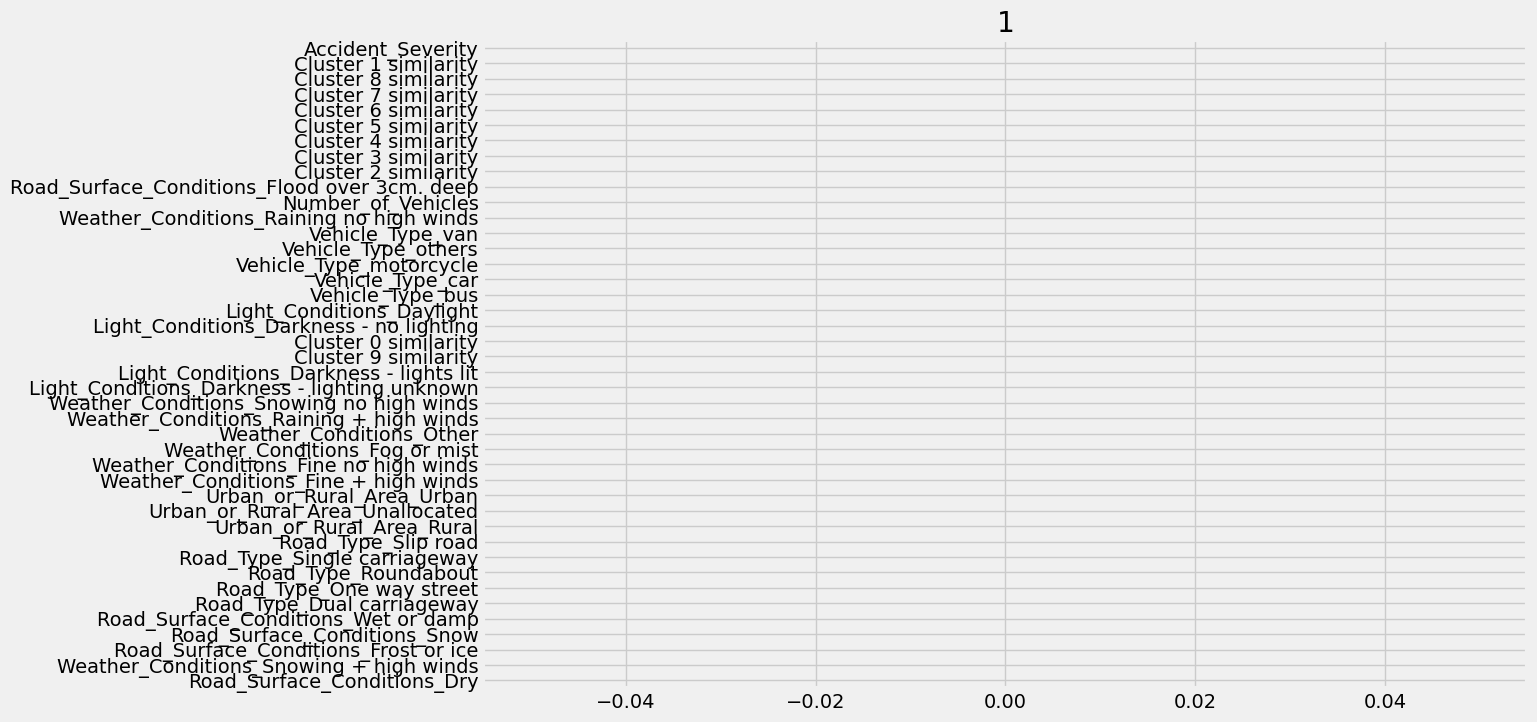

In [101]:
slearner.plot_importance(X=X_transformed_df, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='permutation', 
                         features=feature_names)

**After trying LRSregressor it does not work well since ATE and its confidence interval bounds are unusually large (in the order of hundreds of millions to billions)**

### TRY LGBM

In [103]:
from causalml.inference.meta import BaseSRegressor
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor()

# Initialize the BaseSRegressor with LightGBM as the base model
slearner = BaseSRegressor(learner=lgbm_model)

# Fit the model and estimate the ATE
ate_s = slearner.estimate_ate(X=X, treatment=w, y=y)

# Print the estimated ATE
print('Estimated ATE using LightGBM with BaseSRegressor:', ate_s)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2625
[LightGBM] [Info] Number of data points in the train set: 660679, number of used features: 41
[LightGBM] [Info] Start training from score 1.357040
Estimated ATE using LightGBM with BaseSRegressor: [0.02465004]


In [104]:
slearner_tau = slearner.fit_predict(X, w, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2625
[LightGBM] [Info] Number of data points in the train set: 660679, number of used features: 41
[LightGBM] [Info] Start training from score 1.357040


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

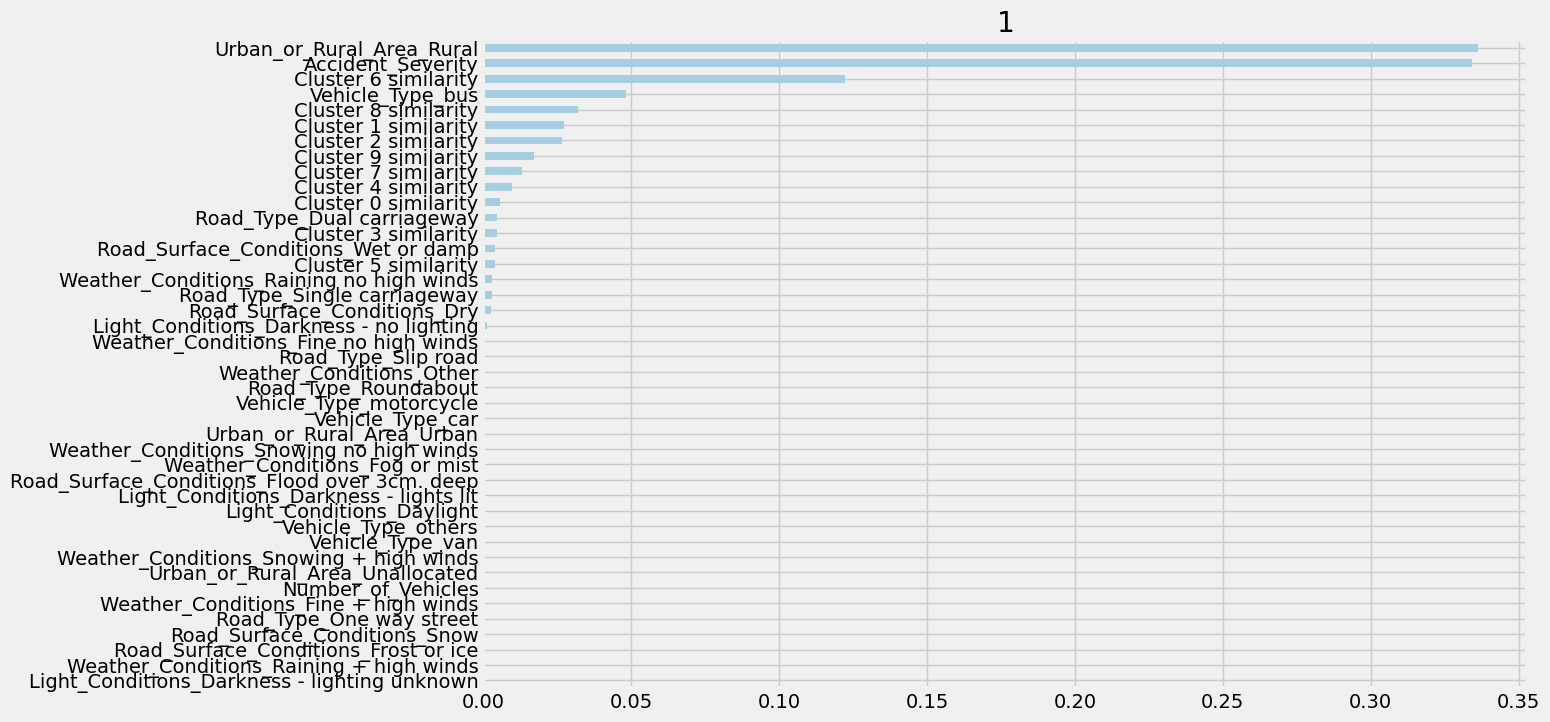

In [105]:
slearner.plot_importance(X=X_transformed_df, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

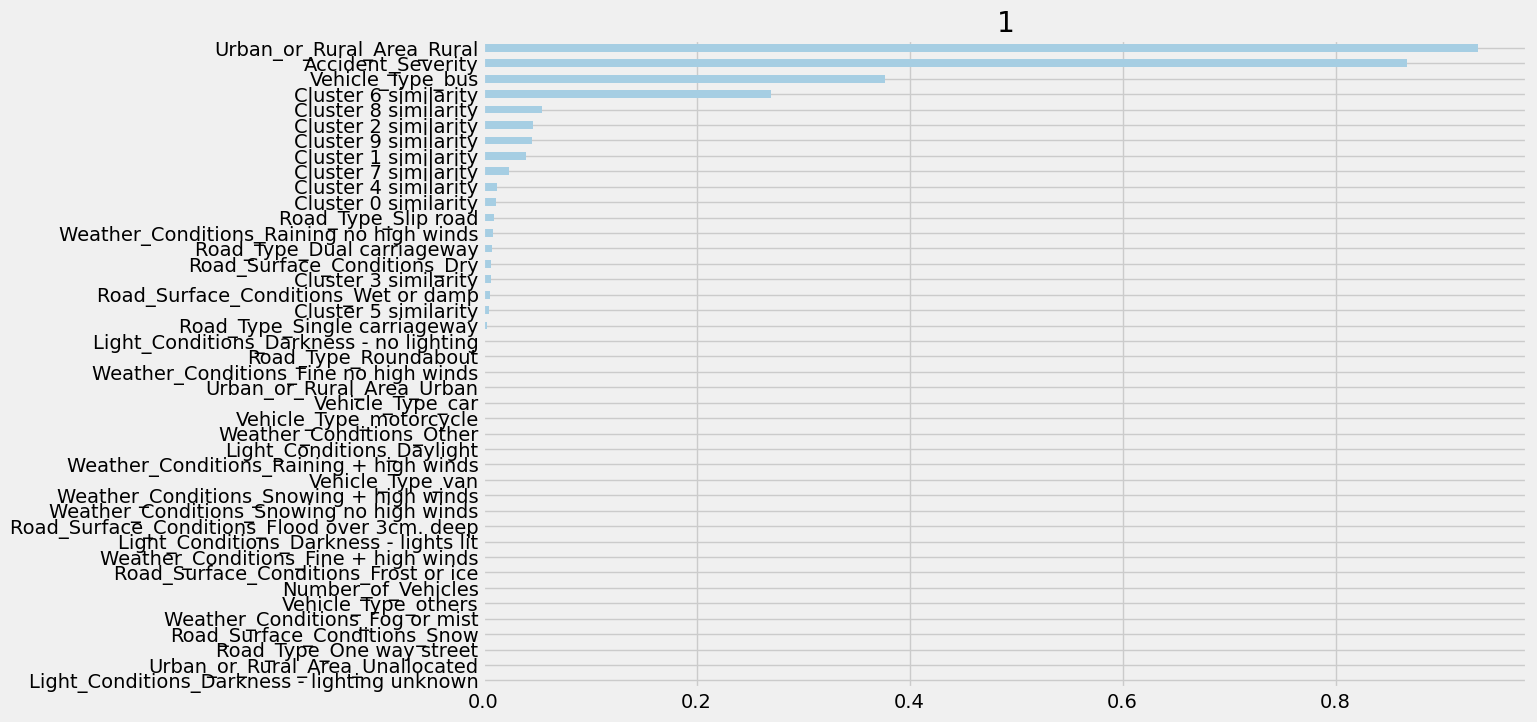

In [106]:
slearner.plot_importance(X=X_transformed_df, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='permutation', 
                         features=feature_names)

### Compare the results of feature importance using the `auto` method and the `permutation` method within the LightGBM framework:
### Auto Feature Importance:

- **Urban_or_Rural_Area_Rural**, **Accident_Severity**, and **Vehicle_Type_bus** are the top three features with the highest importance scores.
- Features related to **Cluster Similarity** and **Road_Type** also appear to be significant.
- **Weather Conditions** and **Light Conditions** have moderate importance.
- Most features have non-zero importance, which indicates that this method finds a variety of features to be predictive.

### Permutation Feature Importance:

- **Urban_or_Rural_Area_Rural** retains the highest importance score, which is consistent with the "auto" method.
- **Accident_Severity** still remains significant but with a reduced importance compared to the "auto" method.
- **Vehicle_Type_bus** also remains in the top features but not as prominent as in the "auto" method.
- There is a general reduction in the importance scores across all features compared to the "auto" method.
- The importance scores are more evenly distributed, and several features that had higher importance in the "auto" method show less importance here.



**Shapley Values**

In [126]:
shap_tlearner = tlearner.get_shap_values(X=X_transformed_df, tau=tlearner_tau)
shap_tlearner

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

{1: array([[ 9.35117604e-04, -1.13130671e-06, -3.64885268e-04, ...,
         -2.81631006e-03,  4.02425092e-03,  2.47571888e-02],
        [-2.64907439e-03, -1.13130671e-06, -3.84291624e-04, ...,
         -7.51819837e-04,  4.76786271e-03,  1.67626797e-02],
        [-4.84392810e-04, -1.13130671e-06, -6.81549916e-04, ...,
          2.63119957e-02,  3.46519983e-03,  1.11470642e-02],
        ...,
        [ 2.27151433e-03, -6.30387261e-07,  4.56221087e-02, ...,
         -1.24320178e-02, -2.52257417e-02, -6.43890397e-02],
        [-1.84590555e-03, -6.30387261e-07, -4.01845599e-03, ...,
         -1.19633367e-02, -3.61566365e-02, -4.86746038e-03],
        [-1.75363315e-03, -6.30387261e-07, -2.64705442e-03, ...,
         -1.08004199e-02, -1.76621566e-02,  1.84946579e-02]])}

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

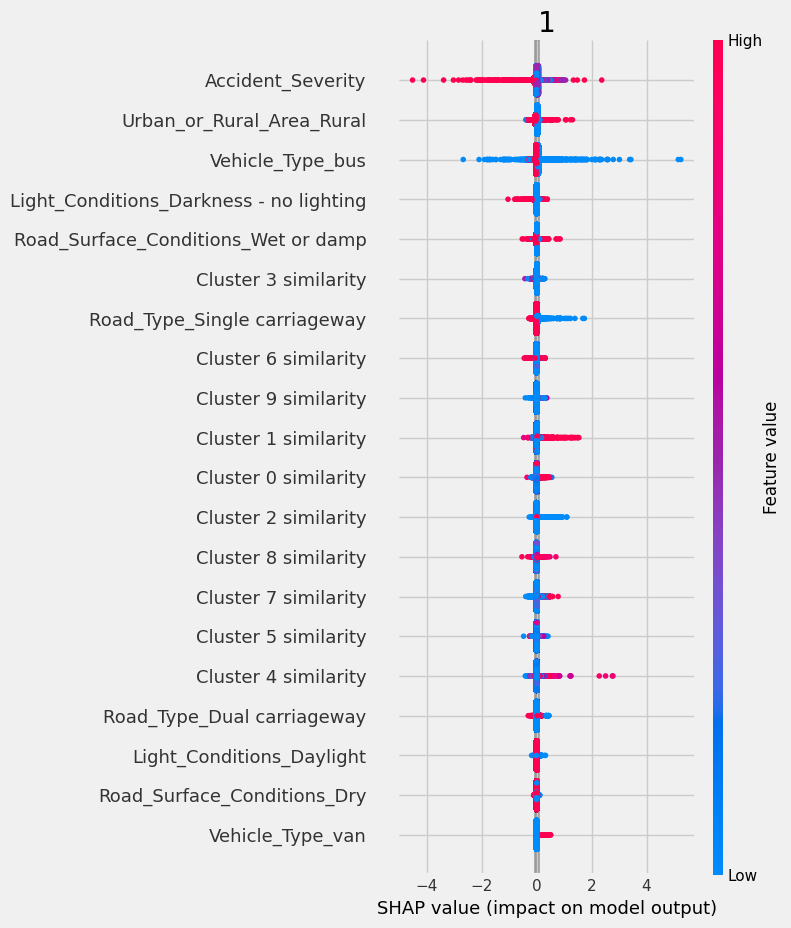

In [127]:
# without providing shap_dict
tlearner.plot_shap_values(X=X_transformed_df, tau=tlearner_tau, features=feature_names)

In [128]:
# with providing shap_dict
tlearner.plot_shap_values(X=X_transformed_df, shap_dict=shap_tlearner)

In [129]:

shap_slearner = slearner.get_shap_values(X=X_transformed_df, tau=slearner_tau)
shap_slearner

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

{1: array([[ 0.00056553,  0.        ,  0.        , ..., -0.00747018,
         -0.00164493,  0.01051902],
        [-0.00140226,  0.        ,  0.        , ..., -0.00711147,
         -0.00159438,  0.01004553],
        [ 0.00041404,  0.        ,  0.        , ..., -0.0024607 ,
         -0.00085247, -0.01724756],
        ...,
        [-0.00081125,  0.        ,  0.        , ..., -0.00141111,
         -0.00019299, -0.00670866],
        [-0.00076144,  0.        ,  0.        , ..., -0.00192167,
         -0.00061021,  0.0056044 ],
        [-0.00068722,  0.        ,  0.        , ..., -0.0014699 ,
         -0.00063965, -0.00634056]])}

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

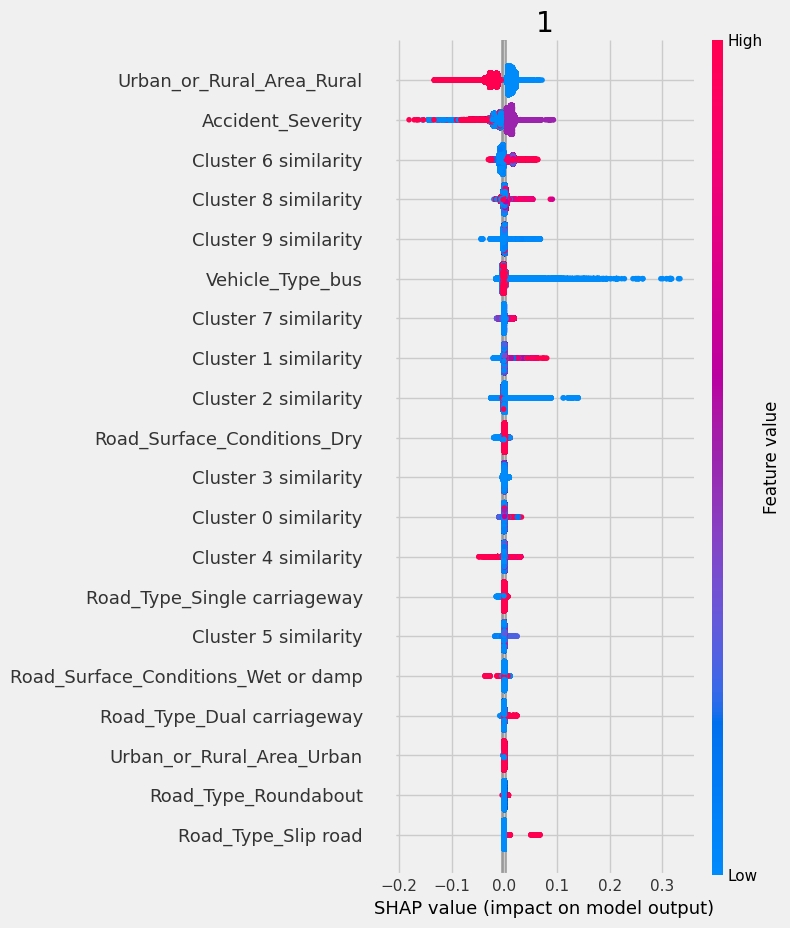

In [130]:
# without providing shap_dict
slearner.plot_shap_values(X=X_transformed_df, tau=slearner_tau, features=feature_names)

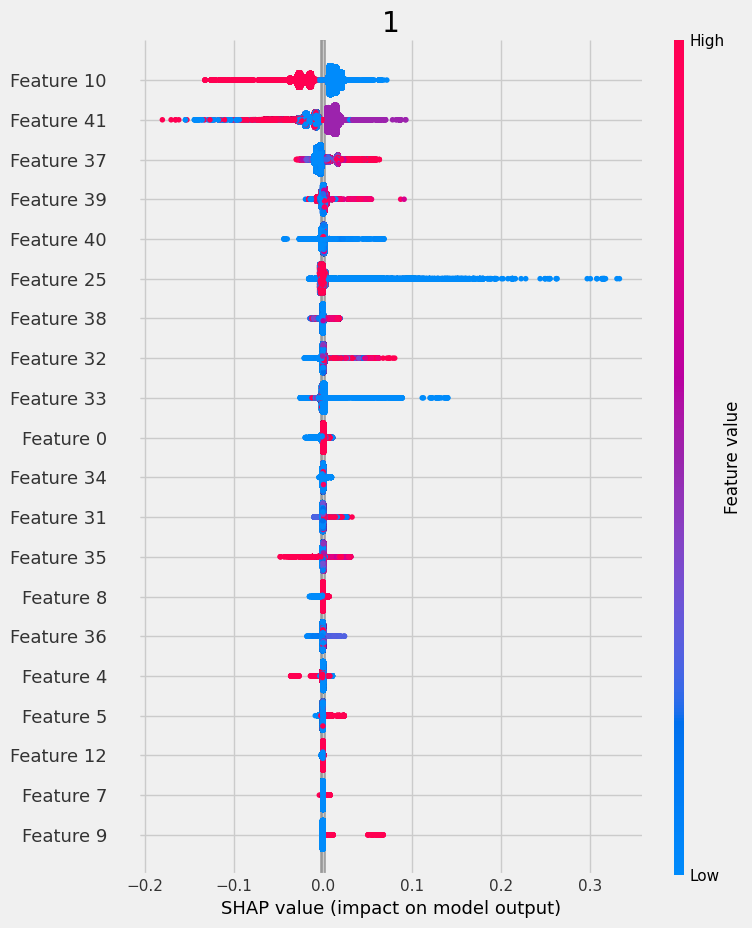

In [131]:
# with providing shap_dict
slearner.plot_shap_values(X=X_transformed_df, shap_dict=shap_slearner)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

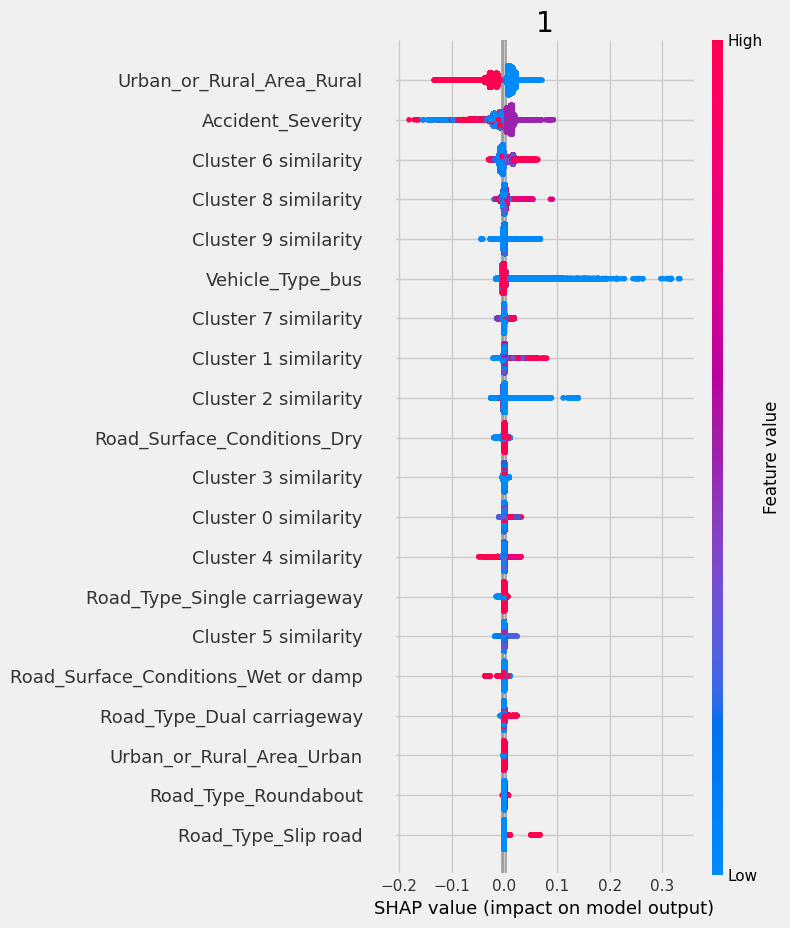

In [132]:
slearner.plot_shap_values(X=X_transformed_df, tau=slearner_tau, features=feature_names)


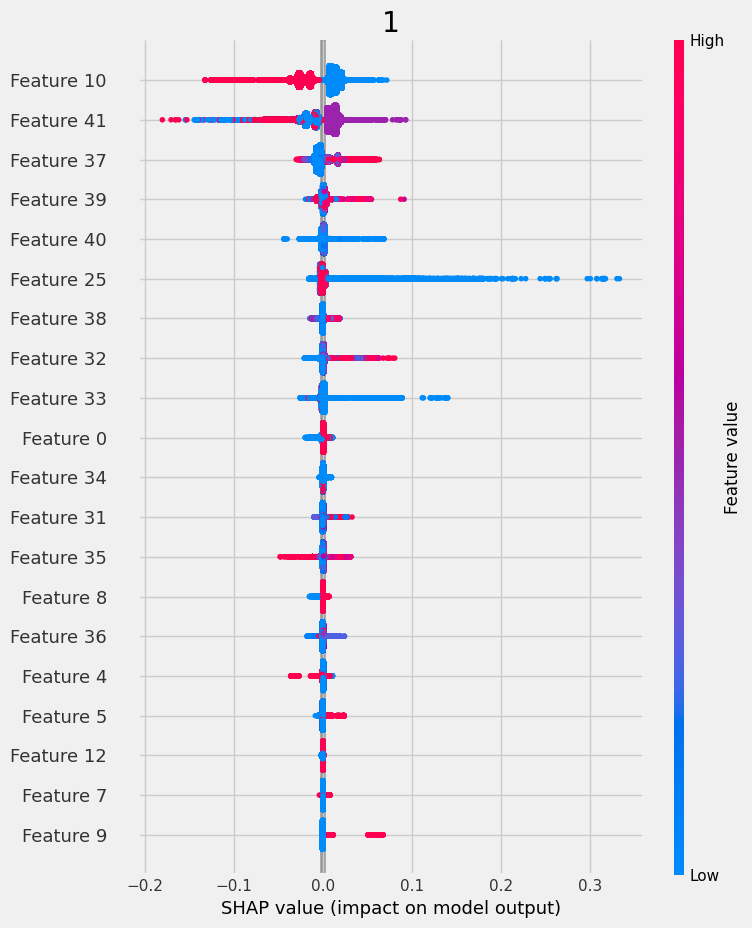

In [133]:
slearner.plot_shap_values(X=X_transformed_df, shap_dict=shap_slearner)


### Feature importance of test set under XGBT framework

In [123]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from causalml.inference.meta import XGBTRegressor
import pandas as pd

# Assume X_transformed_df, treatment, and y are already defined

# Split the data
X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(
    X_transformed_df, w, y, test_size=0.3, random_state=42
)

# Initialize the XGBTRegressor model
xgbt_model = XGBTRegressor()

# Fit the model
xgbt_model.fit(X=X_train, treatment=treatment_train, y=y_train)

# Use the model's predict method to get the estimated treatment effects or predictions
# Depending on what you're trying to score, you might need to adjust the following line
y_pred = xgbt_model.predict(X_test)

# Now use permutation importance with a custom scoring function if necessary
perm_imp_test = permutation_importance(
    estimator=xgbt_model,  # The fitted model
    X=X_test,  # The test features
    y=y_test,  # The true outcomes
    n_repeats=10,  # Number of times to permute a feature
    random_state=42,  # Ensures reproducibility
    scoring="neg_mean_squared_error"  # Define the scoring if the model doesn't have a score method
)

# Convert the importances to a Series for nicer output
feature_importances = pd.Series(perm_imp_test.importances_mean, index=X_test.columns).sort_values(ascending=False)

feature_importances


Cluster 0 similarity                            1.479050e+00
Cluster 7 similarity                            5.707620e-01
Cluster 6 similarity                            3.640710e-01
Cluster 4 similarity                            3.195271e-01
Cluster 8 similarity                            2.795755e-01
Cluster 1 similarity                            2.347970e-01
Cluster 3 similarity                            2.329302e-01
Cluster 5 similarity                            2.230214e-01
Cluster 9 similarity                            1.267387e-01
Road_Type_Dual carriageway                      8.733853e-03
Urban_or_Rural_Area_Rural                       6.072375e-03
Road_Type_Single carriageway                    4.349396e-03
Road_Surface_Conditions_Dry                     5.690149e-04
Weather_Conditions_Snowing + high winds         3.391686e-04
Weather_Conditions_Fine no high winds           2.646494e-04
Weather_Conditions_Snowing no high winds        2.434056e-04
Weather_Conditions_Fog o

Text(0.5, 1.0, 'Test Set Permutation Importances')

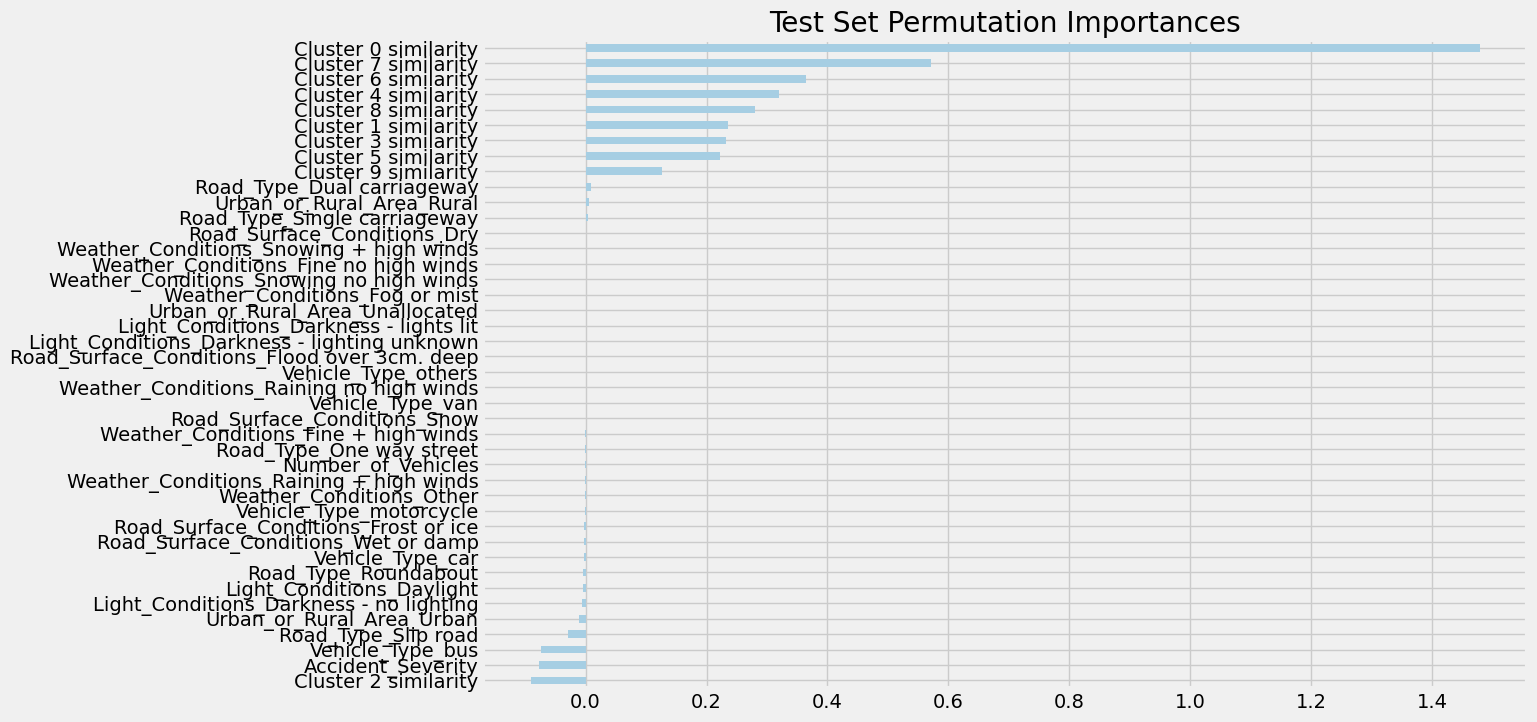

In [125]:
feature_importances.sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

### Feature importance of test set under LGBM framework

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, slearner_tau, test_size=0.3, random_state=42)
model_tau = LGBMRegressor()
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2625
[LightGBM] [Info] Number of data points in the train set: 462475, number of used features: 41
[LightGBM] [Info] Start training from score 0.024657


Urban_or_Rural_Area_Rural                       0.956080
Accident_Severity                               0.873436
Vehicle_Type_bus                                0.372362
Cluster 6 similarity                            0.273121
Cluster 8 similarity                            0.057003
Cluster 9 similarity                            0.054606
Cluster 2 similarity                            0.042430
Cluster 1 similarity                            0.035098
Cluster 7 similarity                            0.027384
Cluster 0 similarity                            0.015977
Cluster 4 similarity                            0.011403
Cluster 5 similarity                            0.010173
Road_Type_Slip road                             0.009690
Road_Type_Dual carriageway                      0.008647
Road_Surface_Conditions_Dry                     0.008019
Weather_Conditions_Raining no high winds        0.006779
Road_Surface_Conditions_Wet or damp             0.006640
Cluster 3 similarity           

In [115]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

Text(0.5, 1.0, 'Test Set Permutation Importances')

## **Conclusion**

When comparing the feature importance results from the LGBM and XGBoost (XGBT) models on the test set, several key observations and differences stand out.

1. **Cluster Similarity Features**:
   - **LGBM**: Cluster similarity features like `Urban_or_Rural_Area_Rural` and `Accident_Severity` top the list, indicating these features are highly influential in LGBM's predictions. This suggests that the model heavily relies on the geographical and severity attributes for its predictions.
   - **XGBoost**: Similarly, cluster similarity features are very important but the order is different. For example, `Cluster 0 similarity` has the highest importance in XGBoost, unlike in LGBM where it's lower. This variance implies that XGBoost might be capturing different aspects of the data through these cluster similarities or weighing them differently.

2. **Geographical Features**:
   - **LGBM**: `Urban_or_Rural_Area_Rural` is the most important feature, significantly more than `Urban_or_Rural_Area_Urban`. This could indicate that rural areas have distinct characteristics or patterns that are highly predictive.
   - **XGBoost**: Shows a lower importance for `Urban_or_Rural_Area_Rural` and a negative importance for `Urban_or_Rural_Area_Urban`, which suggests a different interpretation of how urbanity influences the number of causalties. The negative importance might indicate an inverse relationship for some features in the XGBoost model.

3. **Vehicle and Road Type Features**:
   - **LGBM**: Vehicle type (`Vehicle_Type_bus`) and various road types have moderate to low importance. This suggests that while they are considered, they are not as critical as geographical or cluster similarity features.
   - **XGBoost**: `Vehicle_Type_bus` and `Road_Type_Slip road` have negative importance, suggesting that their presence (or the pattern they represent) might lead to a lower probability of the predicted outcome. This contrasts with LGBM, where these features had a positive, albeit small, importance.

4. **Weather and Light Conditions**:
   - Both models attribute low to negligible importance to weather conditions and light conditions, though XGBoost assigns negative importance to several of these features, indicating a potential predictive value in the absence (or presence) of these conditions.

5. **Negative Importance in XGBoost**:
   - XGBoost shows negative importance for several features, including some cluster similarities, vehicle types, and road conditions. Negative importance in XGBoost can suggest that the model finds a reverse correlation with the target variable. In contrast, LGBM's importances are all non-negative, which aligns with its method of calculating feature importance.


In summary, both models consider cluster similarities and geographical features as important, but they diverge significantly in how they evaluate the importance of specific features, including vehicle types, road types, and weather conditions. The original hypothesis of taking lights-lit as treatment does not affect the outcome as much as expected.